# Reason for choosing this dataset

Choosing this data science salary dataset for the term project was motivated by its significance to current job market trends, its relevance to a wide audience including practitioners and aspirants in the field of data science, and the rich analytical opportunities it presents. It offers a comprehensive global perspective on vital aspects like salary trends, employment types, and experience levels across different geographies. This not only allows for an extensive comparative and trend analysis over time but also provides practical insights useful for both job seekers and employers. 

The dataset is from Kaggle and is found here: https://www.kaggle.com/datasets/zain280/data-science-salaries

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read data and preview the first 5 rows
df = pd.read_csv('ds_salaries.csv')

df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# check for missing values
df.isnull().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
# show info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# show the statistics of the dataset
df.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
# check if data can be categorized
df.nunique()

id                    607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
# convert work_year to a datetime object
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020-01-01,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020-01-01,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020-01-01,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020-01-01,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020-01-01,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# remove the id column
df.drop("id", axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020-01-01,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020-01-01,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020-01-01,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020-01-01,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020-01-01,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<Axes: title={'center': 'Remote Ratio Distribution'}, xlabel='remote_ratio'>

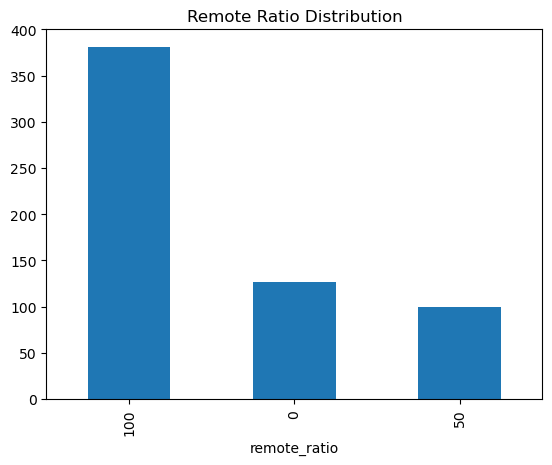

In [9]:
# bar chart to see the distibution of the remote ratio
df['remote_ratio'].value_counts().plot(kind='bar', title='Remote Ratio Distribution')

<Axes: title={'center': 'Top 10 Job Titles'}, ylabel='job_title'>

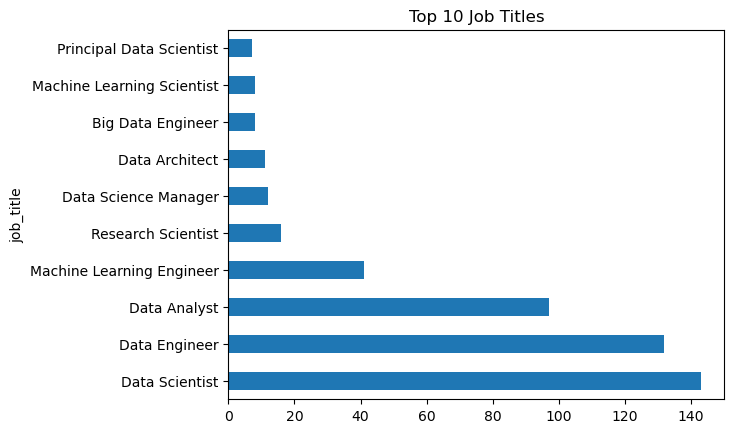

In [10]:
# a barchart to see what are the top 10 most frequent job titles
df['job_title'].value_counts().head(10).plot(kind='barh', title='Top 10 Job Titles')

<Axes: xlabel='salary_in_usd'>

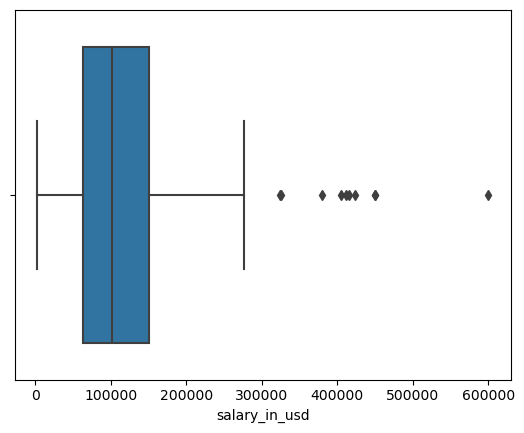

In [11]:
# boxplot to see the outliers in salaries in usd
sns.boxplot(x=df['salary_in_usd'])

# Exploring the Dataset

- How many observations do you have?
    - Using df.info() we can see that there are 607 observations
- How many unique categories are there for categorical variables?
    - Using df.nunique() we can see that 
        - the data spans across 3 years 
        - there are 4 levels of work experience
        - there are also 4 types of employment 
        - there are 50 job titles
        - there are 17 different types of currency
        - there are 57 different countries that the employees are in
        - there are 3 remote ratios
        - there are 50 different countries that the companies are in
        - there are 3 sizes for the company
- How much missing data is there per observation or per variable?
    - There is no missing data in the dataset
- What are the distributions of continuous variables? Are there outliers?
    - Looking at the graph for the salaries in usd we can see that there are a few outliers that are above the upper extreme

# Data Dictionary

- work_year: 
    - The year in which the salary was paid
- experience_level: 
    - Categorical level of experience (EN: Entry-level, MI: Mid-Level, SE: Senior-level, EX: Executive-level)
- employment_type: 
    - Type of employment (FT: Full-time, PT: Part-time, CT: Contract, FL: Freelance)
- job_title: 
    - Title of the job
- salary: 
    - Salary in the original currency
- salary_currency: 
    - Currency of the salary
- salary_in_usd: 
    - Salary converted to USD
- employee_residence: 
    - Country of residence of the employee
- remote_ratio: 
    - Percentage of work done remotely (0, 50, 100)
- company_location: 
    - Country in which the company is located
- company_size: 
    - Size of the company (S: Small, M: Medium, L: Large)


# UI Components Idea:

1. Filters for year, experience level, employment type to customize the analysis
2. A search bar to filter by job title
3. Toggle switches for company size and remote ratio

# Data Visualization Ideas:

1. Histogram of salaries in USD to see the distribution of salaries across the dataset
2. A scatter plot showing the relation between experience level and salary in USD
3. Bar chart of average salary by job title for the top 10 most frequent job titles
4. Boxplot showing salary distribution by company size
5. Bubble chart of job titles by average salary and number of positions (size of bubble)
6. Heatmap showing the correlation between numerical fields like salary_in_usd, remote_ratio, and the year

In [12]:
# To export the cleaned data
df.to_csv('data.csv', index=False)